# TITANIC dataset

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [151]:
train = pd.read_csv("titanic_train.csv")

In [152]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

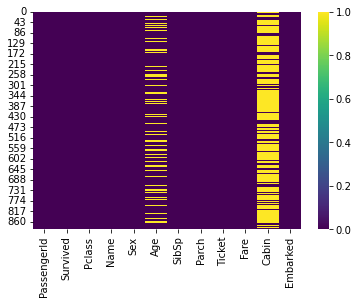

In [11]:
sns.heatmap(data=train.isnull(), cmap='viridis')

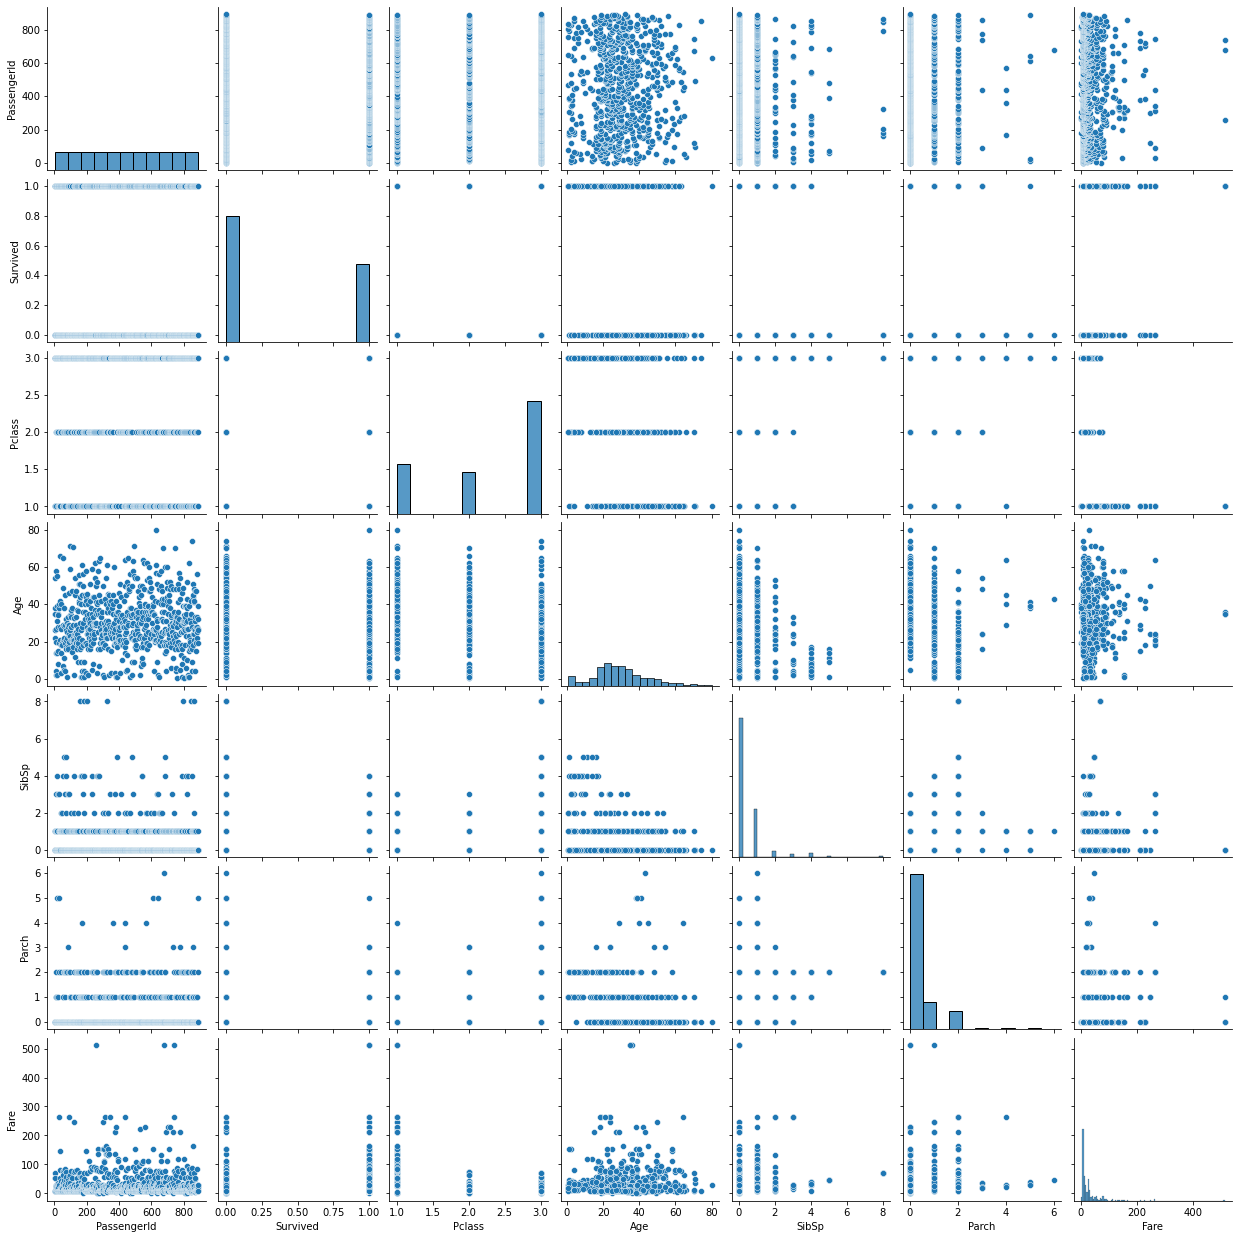

In [12]:
sns.pairplot(train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

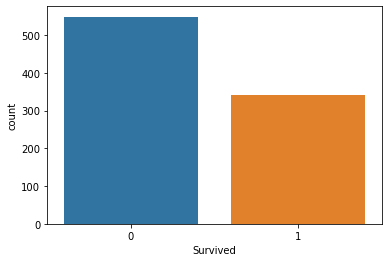

In [13]:
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

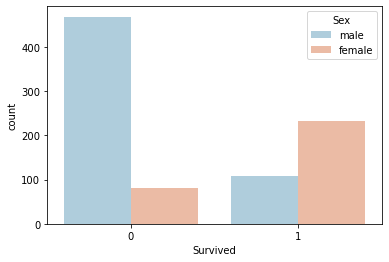

In [14]:
sns.countplot(x='Survived',data =train,hue='Sex',palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

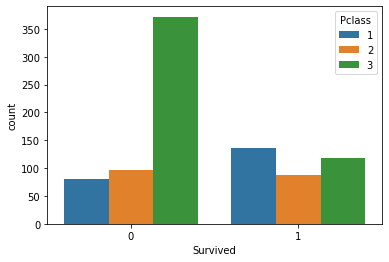

In [15]:
sns.countplot(x='Survived',data =train,hue='Pclass')

<AxesSubplot:xlabel='Age'>

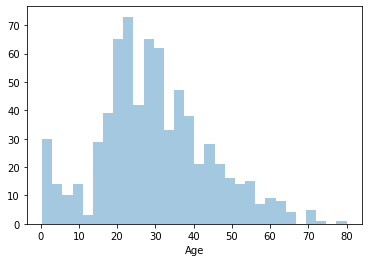

In [17]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:ylabel='Frequency'>

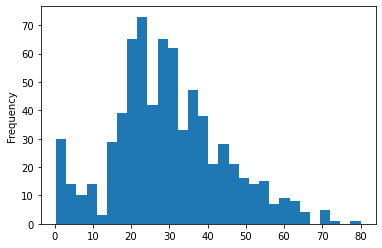

In [20]:
train['Age'].plot.hist(bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

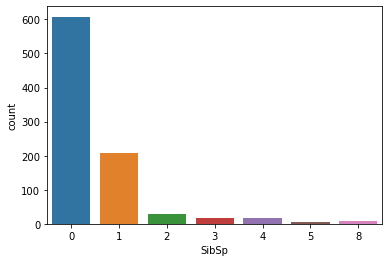

In [21]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

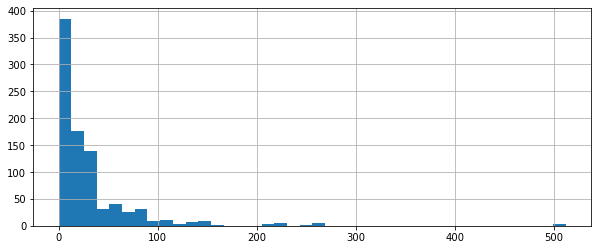

In [25]:
train["Fare"].hist(bins=40,figsize=(10,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

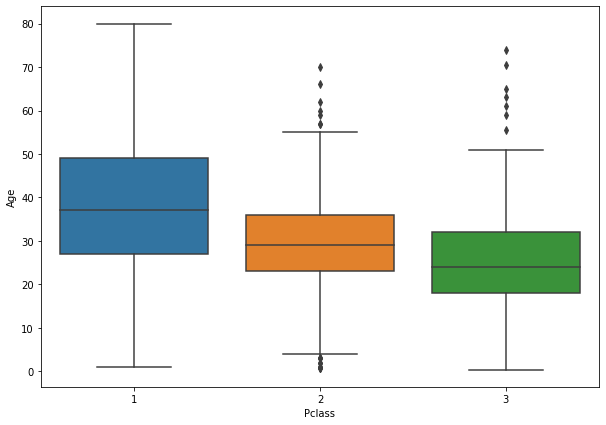

In [32]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y="Age",data=train)


In [154]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age  

In [155]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [156]:
#v Also, cabin column has many null values, so droopinh the column:
train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

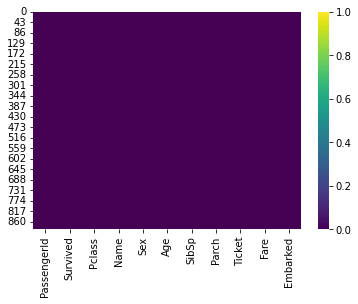

In [157]:
sns.heatmap(data=train.isnull(),cmap='viridis')

Now data is cleaned

## Logistic Regression

In [103]:
# convert categorical columns into dummy variable(indicator variables) so that ML algorithm can underatand:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [104]:
train['Sex'].head(5)

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [105]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [106]:
embark =pd.get_dummies(train['Embarked'],drop_first=True)

In [107]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [108]:
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [109]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [110]:
train.drop('PassengerId',axis=1,inplace=True)

In [111]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [112]:
pclass = pd.get_dummies(train['Pclass'],drop_first=True)

In [113]:
pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [114]:
train2 = train.copy()

In [115]:
train2.drop('Pclass',axis=1,inplace=True)

In [116]:
train2.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,0,35.0,0,0,8.0500,1,0,1


In [117]:
train2 = pd.concat([train2,pclass],axis=1)
train2.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [131]:
# considering as if it was all the data:
X = train.drop('Survived',axis=1)
Y = train['Survived']

In [132]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

In [134]:
from sklearn.linear_model import LogisticRegression

In [146]:
train_model = LogisticRegression(max_iter=500)

In [147]:
train_model.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

In [148]:
train_model_pre = train_model.predict(X_test)

In [166]:
train_model_pre

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [143]:
from sklearn.metrics import classification_report

In [149]:
print(classification_report(Y_test, train_model_pre))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [150]:
from sklearn.metrics import confusion_matrix

In [77]:
print(confusion_matrix(Y_test, train_model_pre))

[[133  21]
 [ 38  76]]


In [78]:
train2.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,0,1


In [160]:
# I dont need SibSp and Parch columns:
X = train2.drop(['SibSp','Parch','male'],axis =1)
Y = train2['male']

In [161]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [162]:
train2_model = LogisticRegression(max_iter=500)

In [163]:
train2_model.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

In [164]:
train2_model2_pred = train2_model.predict(X_test) 

In [165]:
print(classification_report(Y_test, train2_model2_pred))

              precision    recall  f1-score   support

           0       0.65      0.77      0.70        95
           1       0.86      0.77      0.81       173

    accuracy                           0.77       268
   macro avg       0.75      0.77      0.76       268
weighted avg       0.78      0.77      0.77       268

